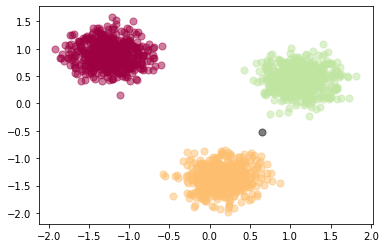

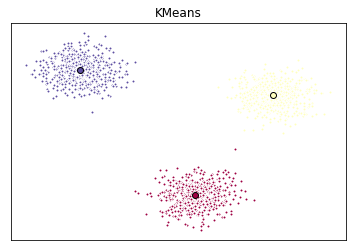

In [41]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

#Creation of Sample Data
X, y = createDataPoints([[4,3], [2,-1], [-1,4]],1500,0.5)

#Modeling
eps = 0.3
min_samples = 7
db = DBSCAN(eps,min_samples)
db.fit(X)
labels = db.labels_
labels

# Distinguish Outliners
core_samples_mask = np.zeros_like(labels,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True # Firts, create an array of booleans using the labels from db.
core_samples_mask
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Number of clusters in labels, ignoring noise if present.
n_clusters_
unique_labels = set(labels)
unique_labels

#DATA VISUALIZATION
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
colors

# Plot the points with colors
#plt.title("Density Based Clustering")
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    
    
    
    
# To better understand differences between partitional and density-based clustering, 
# try to cluster the above dataset into 3 clusters using k-Means.

#K-MEANS

from sklearn.cluster import KMeans 
k_means_model = KMeans(init='k-means++',n_clusters=3, n_init=12)
k_means_model.fit(X)
k_means_model


labels=k_means_model.labels_
center=k_means_model.cluster_centers_

#Demonstrate the clustering
fig=plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
#plt.title("K-Means Clustering")
ax=fig.add_subplot(1,1,1)
for k, col in zip(range(len(center)), colors):
    my_members = (labels == k)
    cluster_center = center[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('KMeans')

ax.set_xticks(())

ax.set_yticks(())

plt.show()